# Bài tập

Sử dụng 1 bộ dữ liệu time-series bất kì (1 biến hoặc nhiều biến).
tại link (https://github.com/thieu1995/csv-files/).

Chọn một model regression bất kì trên scikit-learn (https://scikit-learn.org/stable/search.html?q=regression)

Áp dụng các kĩ thuật trên lớp vào bộ dữ liệu time-series trên.

1. Scaling, (1 điểm)

2. Building, (1 điểm)

3. Hyper-parameter tuning, (2 điểm)

4. Pipeline, (1 điểm)

5. GridsearchCV, (1 điểm)

6. Forecasting, (1 điểm)

7. Calculate Metrics ví dụ như RMSE, MSE, MAE, MAPE (2 điểm)

8. Vẽ đồ thị giá trị thực tế và dự đoán (1 điểm)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_path = "Aquifer_Luco.csv"
col = "Depth_to_Groundwater_Podere_Casetta"

,Date,Rainfall_Simignano,Rainfall_Siena_Poggio_al_Vento,Rainfall_Mensano,Rainfall_Montalcinello,Rainfall_Monticiano_la_Pineta,Rainfall_Sovicille,Rainfall_Ponte_Orgia,Rainfall_Scorgiano,Rainfall_Pentolina,...,Depth_to_Groundwater_Pozzo_1,Depth_to_Groundwater_Pozzo_3,Depth_to_Groundwater_Pozzo_4,Temperature_Siena_Poggio_al_Vento,Temperature_Mensano,Temperature_Pentolina,Temperature_Monteroni_Arbia_Biena,Volume_Pozzo_1,Volume_Pozzo_3,Volume_Pozzo_4
0,01/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,0.00,5.50,0.80,NaN,NaN,NaN
1,02/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,0.00,6.20,3.25,NaN,NaN,NaN
2,03/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,0.00,7.25,0.95,NaN,NaN,NaN
3,04/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,0.00,7.00,4.20,NaN,NaN,NaN
4,05/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,0.00,7.90,6.55,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7482,26/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-12.0,-10.7,-11.1,24.45,22.65,22.50,19.55,-125.506506,-147.012716,-49.136663
7483,27/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-12.1,-10.8,-11.1,24.80,22.95,22.60,20.15,-125.506506,-147.012716,-49.136663
7484,28/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-12.1,-10.7,-11.1,25.90,23.40,23.80,21.05,-125.506506,-147.012716,-49.136663
7485,29/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-12.2,-10.8,-11.1,24.85,23.30,23.55,20.30,-125.506506,-147.012716,-49.136663


In [7]:
def get_df():
    df = pd.read_csv(data_path)
    df.head()
    df = df[['Date',col]]
    df.dropna(inplace=True)
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    return df

df = get_df()
df.head(10)

,Date,Depth_to_Groundwater_Podere_Casetta,Year,Month
2973,2008-02-21,-8.6,2008,2
2974,2008-02-22,-8.6,2008,2
2975,2008-02-23,-8.6,2008,2
2976,2008-02-24,-8.6,2008,2
2977,2008-02-25,-8.6,2008,2
2978,2008-02-26,-8.6,2008,2
2979,2008-02-27,-8.6,2008,2
2980,2008-02-28,-8.6,2008,2
2981,2008-02-29,-8.6,2008,2
2982,2008-03-01,-8.6,2008,3


In [12]:
#ts_diff = np.diff(df[col])
#df[col+'1'] = np.append([0], ts_diff)
dataset = pd.DataFrame(df[col])

In [13]:
import pandas as pd

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [14]:
data = series_to_supervised(dataset, n_in=3, n_out=1)
print(data)

      var1(t-3)  var1(t-2)  var1(t-1)  var1(t)
2976       -8.6       -8.6       -8.6     -8.6
2977       -8.6       -8.6       -8.6     -8.6
2978       -8.6       -8.6       -8.6     -8.6
2979       -8.6       -8.6       -8.6     -8.6
2980       -8.6       -8.6       -8.6     -8.6
...         ...        ...        ...      ...
6947       -7.6       -7.6       -7.6     -7.6
6948       -7.6       -7.6       -7.6     -7.6
6949       -7.6       -7.6       -7.6     -7.7
6950       -7.6       -7.6       -7.7     -7.7
6951       -7.6       -7.7       -7.7     -7.7

[3343 rows x 4 columns]


In [15]:
X, Y = data[['var1(t-3)', 'var1(t-2)', 'var1(t-1)']], data['var1(t)']
print(X, Y)

      var1(t-3)  var1(t-2)  var1(t-1)
2976       -8.6       -8.6       -8.6
2977       -8.6       -8.6       -8.6
2978       -8.6       -8.6       -8.6
2979       -8.6       -8.6       -8.6
2980       -8.6       -8.6       -8.6
...         ...        ...        ...
6947       -7.6       -7.6       -7.6
6948       -7.6       -7.6       -7.6
6949       -7.6       -7.6       -7.6
6950       -7.6       -7.6       -7.7
6951       -7.6       -7.7       -7.7

[3343 rows x 3 columns] 2976   -8.6
2977   -8.6
2978   -8.6
2979   -8.6
2980   -8.6
       ... 
6947   -7.6
6948   -7.6
6949   -7.7
6950   -7.7
6951   -7.7
Name: var1(t), Length: 3343, dtype: float64


In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, mean_absolute_error

def draw_true_predict(y_true, y_pred):
    size = len(y_true)
    plt.plot(list(range(size)), y_true, label='real', color='blue')
    plt.plot(list(range(size)), y_pred, label='predicted', color='red')
    plt.legend(loc='best')
    plt.title('Real vs Predicted values')
    plt.show()

def calculate_metrics(y_true, y_pred):
    # Calculate metrics
    RMSE = np.sqrt(mean_squared_error(y_true, y_pred))
    MSE = mean_squared_error(y_true, y_pred)
    MAE = mean_absolute_error(y_true, y_pred)
    MAPE = mean_absolute_percentage_error(y_true, y_pred)
    R2 = r2_score(y_true, y_pred)
    print(f"RMSE: {RMSE}, MSE: {MSE}, MAE: {MAE}, MAPE: {MAPE}, R2: {R2}")

RMSE: 0.05463337588890023, MSE: 0.002984805761017865, MAE: 0.023850761932603493, MAPE: 0.003137307076841357, R2: 0.9918141536206132


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


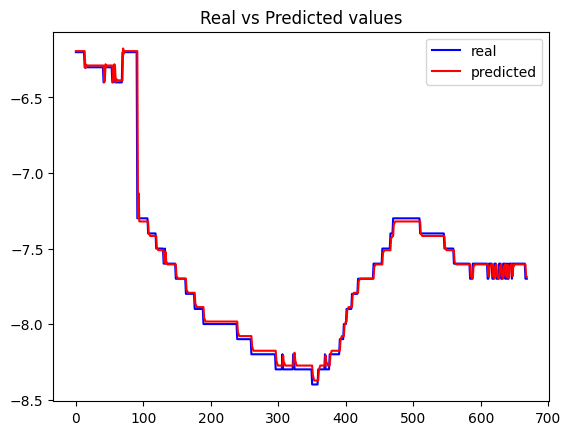

In [17]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

X_run = X.values
Y_run = Y.values

# Split in train-test
X_train, X_test, Y_train, Y_test = train_test_split(X_run, Y_run, test_size=0.2, shuffle=False, random_state=0)
Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

scaler_feature = StandardScaler()
scaler_feature.fit(X_train)
X_train_scaled = scaler_feature.transform(X_train)
X_test_scaled = scaler_feature.transform(X_test)

scaler_label = StandardScaler()
scaler_label.fit(Y_train)
Y_train_scaled = scaler_label.transform(Y_train)
Y_test_scaled = scaler_label.transform(Y_test)


# Initialize the estimator
estimator = SVR(C=10, epsilon=0.1)

# Fit the data
estimator.fit(X_train_scaled, Y_train_scaled)

# Make predictions
y_pred = estimator.predict(X_test_scaled)
y_pred_unscaled = scaler_label.inverse_transform(np.reshape(y_pred, (-1, 1)))

# Calculate metrics
calculate_metrics(Y_test, y_pred_unscaled)

draw_true_predict(Y_test, y_pred_unscaled)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ...C=0.1, epsilon=0.1, kernel=rbf;, score=-3.383 total time=   0.0s
[CV 2/5] END ....C=0.1, epsilon=0.1, kernel=rbf;, score=0.995 total time=   0.0s
[CV 3/5] END ....C=0.1, epsilon=0.1, kernel=rbf;, score=0.990 total time=   0.0s
[CV 4/5] END ....C=0.1, epsilon=0.1, kernel=rbf;, score=0.992 total time=   0.0s
[CV 5/5] END ....C=0.1, epsilon=0.1, kernel=rbf;, score=0.930 total time=   0.0s
[CV 1/5] END .C=0.1, epsilon=0.1, kernel=linear;, score=0.997 total time=   0.0s
[CV 2/5] END .C=0.1, epsilon=0.1, kernel=linear;, score=0.996 total time=   0.0s
[CV 3/5] END .C=0.1, epsilon=0.1, kernel=linear;, score=0.990 total time=   0.0s
[CV 4/5] END .C=0.1, epsilon=0.1, kernel=linear;, score=0.997 total time=   0.0s
[CV 5/5] END .C=0.1, epsilon=0.1, kernel=linear;, score=0.989 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 1/5] END ..C=0.1, epsilon=0.1, kernel=poly;, score=-0.023 total time=  52.3s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=0.1, epsilon=0.1, kernel=poly;, score=0.927 total time=  12.2s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=0.1, epsilon=0.1, kernel=poly;, score=0.955 total time=  15.7s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=0.1, epsilon=0.1, kernel=poly;, score=0.932 total time=  22.1s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=0.1, epsilon=0.1, kernel=poly;, score=-1.488 total time= 1.2min
[CV 1/5] END C=0.1, epsilon=0.1, kernel=sigmoid;, score=-8.924 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=0.1, epsilon=0.1, kernel=sigmoid;, score=-0.498 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, kernel=sigmoid;, score=-0.617 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=0.1, epsilon=0.1, kernel=sigmoid;, score=-1.132 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, kernel=sigmoid;, score=-33.520 total time=   0.0s
[CV 1/5] END ...C=0.1, epsilon=0.2, kernel=rbf;, score=-3.899 total time=   0.0s
[CV 2/5] END ....C=0.1, epsilon=0.2, kernel=rbf;, score=0.972 total time=   0.0s
[CV 3/5] END ....C=0.1, epsilon=0.2, kernel=rbf;, score=0.982 total time=   0.0s
[CV 4/5] END ....C=0.1, epsilon=0.2, kernel=rbf;, score=0.979 total time=   0.0s
[CV 5/5] END ....C=0.1, epsilon=0.2, kernel=rbf;, score=0.947 total time=   0.0s
[CV 1/5] END .C=0.1, epsilon=0.2, kernel=linear;, score=0.963 total time=   0.0s
[CV 2/5] END .C=0.1, epsilon=0.2, kernel=linear;, score=0.993 total time=   0.0s
[CV 3/5] END .C=0.1, epsilon=0.2, kernel=linear;, score=0.989 total time=   0.0s
[CV 4/5] END .C=0.1, epsilon=0.2, kernel=linear;, score=0.992 total time=   0.0s
[CV 5/5] END .C=0.1, epsilon=0.2, kernel=linear;, score=0.924 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 1/5] END ...C=0.1, epsilon=0.2, kernel=poly;, score=0.075 total time=  31.1s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=0.1, epsilon=0.2, kernel=poly;, score=0.883 total time=  23.3s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=0.1, epsilon=0.2, kernel=poly;, score=0.937 total time=  24.4s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=0.1, epsilon=0.2, kernel=poly;, score=0.925 total time=  28.2s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=0.1, epsilon=0.2, kernel=poly;, score=-0.935 total time=  45.4s
[CV 1/5] END C=0.1, epsilon=0.2, kernel=sigmoid;, score=-8.924 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.2, kernel=sigmoid;, score=-0.284 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=0.1, epsilon=0.2, kernel=sigmoid;, score=-0.438 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.2, kernel=sigmoid;, score=-1.132 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=0.1, epsilon=0.2, kernel=sigmoid;, score=-33.520 total time=   0.0s
[CV 1/5] END ...C=0.1, epsilon=0.3, kernel=rbf;, score=-4.027 total time=   0.0s
[CV 2/5] END ....C=0.1, epsilon=0.3, kernel=rbf;, score=0.913 total time=   0.0s
[CV 3/5] END ....C=0.1, epsilon=0.3, kernel=rbf;, score=0.959 total time=   0.0s
[CV 4/5] END ....C=0.1, epsilon=0.3, kernel=rbf;, score=0.936 total time=   0.0s
[CV 5/5] END ....C=0.1, epsilon=0.3, kernel=rbf;, score=0.821 total time=   0.0s
[CV 1/5] END .C=0.1, epsilon=0.3, kernel=linear;, score=0.857 total time=   0.0s
[CV 2/5] END .C=0.1, epsilon=0.3, kernel=linear;, score=0.986 total time=   0.0s
[CV 3/5] END .C=0.1, epsilon=0.3, kernel=linear;, score=0.983 total time=   0.0s
[CV 4/5] END .C=0.1, epsilon=0.3, kernel=linear;, score=0.977 total time=   0.0s
[CV 5/5] END .C=0.1, epsilon=0.3, kernel=linear;, score=0.743 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 1/5] END ...C=0.1, epsilon=0.3, kernel=poly;, score=0.159 total time=   0.7s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=0.1, epsilon=0.3, kernel=poly;, score=0.795 total time=  15.9s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=0.1, epsilon=0.3, kernel=poly;, score=0.891 total time=  35.4s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=0.1, epsilon=0.3, kernel=poly;, score=0.897 total time=  15.3s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=0.1, epsilon=0.3, kernel=poly;, score=0.070 total time=  38.2s
[CV 1/5] END C=0.1, epsilon=0.3, kernel=sigmoid;, score=-8.924 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.3, kernel=sigmoid;, score=-0.284 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=0.1, epsilon=0.3, kernel=sigmoid;, score=-0.438 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.3, kernel=sigmoid;, score=-1.132 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.3, kernel=sigmoid;, score=-30.161 total time=   0.0s
[CV 1/5] END ...C=0.1, epsilon=0.5, kernel=rbf;, score=-4.444 total time=   0.0s
[CV 2/5] END ....C=0.1, epsilon=0.5, kernel=rbf;, score=0.789 total time=   0.0s
[CV 3/5] END ....C=0.1, epsilon=0.5, kernel=rbf;, score=0.904 total time=   0.0s
[CV 4/5] END ....C=0.1, epsilon=0.5, kernel=rbf;, score=0.803 total time=   0.0s
[CV 5/5] END ....C=0.1, epsilon=0.5, kernel=rbf;, score=0.050 total time=   0.0s
[CV 1/5] END .C=0.1, epsilon=0.5, kernel=linear;, score=0.433 total time=   0.0s
[CV 2/5] END .C=0.1, epsilon=0.5, kernel=linear;, score=0.961 total time=   0.0s
[CV 3/5] END .C=0.1, epsilon=0.5, kernel=linear;, score=0.961 total time=   0.0s
[CV 4/5] END .C=0.1, epsilon=0.5, kernel=linear;, score=0.921 total time=   0.0s
[CV 5/5] END .C=0.1, eps

c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 1/5] END ...C=0.1, epsilon=0.5, kernel=poly;, score=0.756 total time=   0.0s
[CV 2/5] END ...C=0.1, epsilon=0.5, kernel=poly;, score=0.797 total time=   0.0s
[CV 3/5] END ...C=0.1, epsilon=0.5, kernel=poly;, score=0.810 total time=   0.0s
[CV 4/5] END ...C=0.1, epsilon=0.5, kernel=poly;, score=0.896 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 5/5] END ...C=0.1, epsilon=0.5, kernel=poly;, score=0.560 total time=   0.1s
[CV 1/5] END C=0.1, epsilon=0.5, kernel=sigmoid;, score=-8.088 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.5, kernel=sigmoid;, score=-0.130 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=0.1, epsilon=0.5, kernel=sigmoid;, score=-0.171 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.5, kernel=sigmoid;, score=-1.132 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.5, kernel=sigmoid;, score=-26.980 total time=   0.0s
[CV 1/5] END ...C=0.1, epsilon=1.0, kernel=rbf;, score=-5.989 total time=   0.0s
[CV 2/5] END ....C=0.1, epsilon=1.0, kernel=rbf;, score=0.675 total time=   0.0s
[CV 3/5] END ....C=0.1, epsilon=1.0, kernel=rbf;, score=0.774 total time=   0.0s
[CV 4/5] END ....C=0.1, epsilon=1.0, kernel=rbf;, score=0.506 total time=   0.0s
[CV 5/5] END ...C=0.1, epsilon=1.0, kernel=rbf;, score=-4.413 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=1.0, kernel=linear;, score=-1.823 total time=   0.0s
[CV 2/5] END .C=0.1, epsilon=1.0, kernel=linear;, score=0.837 total time=   0.0s
[CV 3/5] END .C=0.1, epsilon=1.0, kernel=linear;, score=0.841 total time=   0.0s
[CV 4/5] END .C=0.1, epsilon=1.0, kernel=linear;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.1, epsi

c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 1/5] END C=0.1, epsilon=1.0, kernel=sigmoid;, score=-8.924 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=1.0, kernel=sigmoid;, score=-0.284 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=1.0, kernel=sigmoid;, score=-0.289 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=1.0, kernel=sigmoid;, score=-0.459 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 5/5] END C=0.1, epsilon=1.0, kernel=sigmoid;, score=-33.520 total time=   0.0s
[CV 1/5] END .....C=1, epsilon=0.1, kernel=rbf;, score=-2.465 total time=   0.0s
[CV 2/5] END ......C=1, epsilon=0.1, kernel=rbf;, score=0.996 total time=   0.0s
[CV 3/5] END ......C=1, epsilon=0.1, kernel=rbf;, score=0.991 total time=   0.0s
[CV 4/5] END ......C=1, epsilon=0.1, kernel=rbf;, score=0.996 total time=   0.0s
[CV 5/5] END ......C=1, epsilon=0.1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 1/5] END ...C=1, epsilon=0.1, kernel=linear;, score=0.998 total time=   0.0s
[CV 2/5] END ...C=1, epsilon=0.1, kernel=linear;, score=0.995 total time=   0.0s
[CV 3/5] END ...C=1, epsilon=0.1, kernel=linear;, score=0.991 total time=   0.0s
[CV 4/5] END ...C=1, epsilon=0.1, kernel=linear;, score=0.997 total time=   0.0s
[CV 5/5] END ...C=1, epsilon=0.1, kernel=linear;, score=0.990 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 1/5] END .....C=1, epsilon=0.1, kernel=poly;, score=0.874 total time=  38.1s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=1, epsilon=0.1, kernel=poly;, score=0.882 total time=  58.7s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=1, epsilon=0.1, kernel=poly;, score=0.954 total time= 1.7min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=1, epsilon=0.1, kernel=poly;, score=0.958 total time= 1.8min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=1, epsilon=0.1, kernel=poly;, score=-5.021 total time=  48.0s
[CV 1/5] END .C=1, epsilon=0.1, kernel=sigmoid;, score=-8.924 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .C=1, epsilon=0.1, kernel=sigmoid;, score=-0.498 total time=   0.0s
[CV 3/5] END .C=1, epsilon=0.1, kernel=sigmoid;, score=-0.617 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .C=1, epsilon=0.1, kernel=sigmoid;, score=-1.132 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, kernel=sigmoid;, score=-33.520 total time=   0.0s
[CV 1/5] END .....C=1, epsilon=0.2, kernel=rbf;, score=-3.182 total time=   0.0s
[CV 2/5] END ......C=1, epsilon=0.2, kernel=rbf;, score=0.977 total time=   0.0s
[CV 3/5] END ......C=1, epsilon=0.2, kernel=rbf;, score=0.983 total time=   0.0s
[CV 4/5] END ......C=1, epsilon=0.2, kernel=rbf;, score=0.983 total time=   0.0s
[CV 5/5] END ......C=1, epsilon=0.2, kernel=rbf;, score=0.951 total time=   0.0s
[CV 1/5] END ...C=1, epsilon=0.2, kernel=linear;, score=0.995 total time=   0.0s
[CV 2/5] END ...C=1, epsilon=0.2, kernel=linear;, score=0.992 total time=   0.0s
[CV 3/5] END ...C=1, epsilon=0.2, kernel=linear;, score=0.989 total time=   0.0s
[CV 4/5] END ...C=1, epsilon=0.2, kernel=linear;, score=0.991 total time=   0.0s
[CV 5/5] END ...C=1, epsilon=0.2, kernel=linear;, score=0.932 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 1/5] END ....C=1, epsilon=0.2, kernel=poly;, score=-8.573 total time=  56.4s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=1, epsilon=0.2, kernel=poly;, score=0.876 total time= 3.3min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=1, epsilon=0.2, kernel=poly;, score=0.967 total time= 1.6min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=1, epsilon=0.2, kernel=poly;, score=0.956 total time= 1.7min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=1, epsilon=0.2, kernel=poly;, score=-3.378 total time= 1.3min
[CV 1/5] END .C=1, epsilon=0.2, kernel=sigmoid;, score=-8.924 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .C=1, epsilon=0.2, kernel=sigmoid;, score=-0.284 total time=   0.0s
[CV 3/5] END .C=1, epsilon=0.2, kernel=sigmoid;, score=-0.438 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .C=1, epsilon=0.2, kernel=sigmoid;, score=-1.132 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.2, kernel=sigmoid;, score=-33.520 total time=   0.0s
[CV 1/5] END .....C=1, epsilon=0.3, kernel=rbf;, score=-3.229 total time=   0.0s
[CV 2/5] END ......C=1, epsilon=0.3, kernel=rbf;, score=0.927 total time=   0.0s
[CV 3/5] END ......C=1, epsilon=0.3, kernel=rbf;, score=0.963 total time=   0.0s
[CV 4/5] END ......C=1, epsilon=0.3, kernel=rbf;, score=0.946 total time=   0.0s
[CV 5/5] END ......C=1, epsilon=0.3, kernel=rbf;, score=0.790 total time=   0.0s
[CV 1/5] END ...C=1, epsilon=0.3, kernel=linear;, score=0.949 total time=   0.0s
[CV 2/5] END ...C=1, epsilon=0.3, kernel=linear;, score=0.987 total time=   0.0s
[CV 3/5] END ...C=1, epsilon=0.3, kernel=linear;, score=0.983 total time=   0.0s
[CV 4/5] END ...C=1, epsilon=0.3, kernel=linear;, score=0.978 total time=   0.0s
[CV 5/5] END ...C=1, epsilon=0.3, kernel=linear;, score=0.766 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 1/5] END .....C=1, epsilon=0.3, kernel=poly;, score=0.025 total time=   6.5s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=1, epsilon=0.3, kernel=poly;, score=0.837 total time= 2.5min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=1, epsilon=0.3, kernel=poly;, score=0.920 total time= 1.4min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=1, epsilon=0.3, kernel=poly;, score=0.915 total time= 1.8min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=1, epsilon=0.3, kernel=poly;, score=-6.192 total time= 1.9min
[CV 1/5] END .C=1, epsilon=0.3, kernel=sigmoid;, score=-8.924 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .C=1, epsilon=0.3, kernel=sigmoid;, score=-0.284 total time=   0.0s
[CV 3/5] END .C=1, epsilon=0.3, kernel=sigmoid;, score=-0.438 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .C=1, epsilon=0.3, kernel=sigmoid;, score=-1.132 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.3, kernel=sigmoid;, score=-30.161 total time=   0.0s
[CV 1/5] END .....C=1, epsilon=0.5, kernel=rbf;, score=-3.786 total time=   0.0s
[CV 2/5] END ......C=1, epsilon=0.5, kernel=rbf;, score=0.750 total time=   0.0s
[CV 3/5] END ......C=1, epsilon=0.5, kernel=rbf;, score=0.909 total time=   0.0s
[CV 4/5] END ......C=1, epsilon=0.5, kernel=rbf;, score=0.806 total time=   0.0s
[CV 5/5] END ......C=1, epsilon=0.5, kernel=rbf;, score=0.064 total time=   0.0s
[CV 1/5] END ...C=1, epsilon=0.5, kernel=linear;, score=0.451 total time=   0.0s
[CV 2/5] END ...C=1, epsilon=0.5, kernel=linear;, score=0.964 total time=   0.0s
[CV 3/5] END ...C=1, epsilon=0.5, kernel=linear;, score=0.961 total time=   0.0s
[CV 4/5] END ...C=1, epsilon=0.5, kernel=linear;, score=0.923 total time=   0.0s
[CV 5/5] END ...C=1, epsilon=0.5, kernel=linear;, score=0.159 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 1/5] END .....C=1, epsilon=0.5, kernel=poly;, score=0.864 total time=   0.7s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=1, epsilon=0.5, kernel=poly;, score=0.775 total time=   0.5s
[CV 3/5] END .....C=1, epsilon=0.5, kernel=poly;, score=0.810 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=1, epsilon=0.5, kernel=poly;, score=0.890 total time=   1.1s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=1, epsilon=0.5, kernel=poly;, score=0.607 total time=   0.3s
[CV 1/5] END .C=1, epsilon=0.5, kernel=sigmoid;, score=-8.088 total time=   0.0s
[CV 2/5] END .C=1, epsilon=0.5, kernel=sigmoid;, score=-0.130 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .C=1, epsilon=0.5, kernel=sigmoid;, score=-0.171 total time=   0.0s
[CV 4/5] END .C=1, epsilon=0.5, kernel=sigmoid;, score=-1.132 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.5, kernel=sigmoid;, score=-26.980 total time=   0.0s
[CV 1/5] END .....C=1, epsilon=1.0, kernel=rbf;, score=-5.559 total time=   0.0s
[CV 2/5] END ......C=1, epsilon=1.0, kernel=rbf;, score=0.668 total time=   0.0s
[CV 3/5] END ......C=1, epsilon=1.0, kernel=rbf;, score=0.774 total time=   0.0s
[CV 4/5] END ......C=1, epsilon=1.0, kernel=rbf;, score=0.507 total time=   0.0s
[CV 5/5] END .....C=1, epsilon=1.0, kernel=rbf;, score=-4.278 total time=   0.0s
[CV 1/5] END ..C=1, epsilon=1.0, kernel=linear;, score=-1.823 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 2/5] END ...C=1, epsilon=1.0, kernel=linear;, score=0.837 total time=   0.0s
[CV 3/5] END ...C=1, epsilon=1.0, kernel=linear;, score=0.841 total time=   0.0s
[CV 4/5] END ...C=1, epsilon=1.0, kernel=linear;, score=0.627 total time=   0.0s
[CV 5/5] END ..C=1, epsilon=1.0, kernel=linear;, score=-3.259 total time=   0.0s
[CV 1/5] END ....C=1, epsilon=1.0, kernel=poly;, score=-0.951 total time=   0.0s
[CV 2/5] END .....C=1, epsilon=1.0, kernel=poly;, score=0.428 total time=   0.0s
[CV 3/5] END .....C=1, epsilon=1.0, kernel=poly;, score=0.547 total time=   0.0s
[CV 4/5] END .....C=1, epsilon=1.0, kernel=poly;, score=0.679 total time=   0.0s
[CV 5/5] END ....C=1, epsilon=1.0, kernel=poly;, score=-1.822 total time=   0.0s
[CV 1/5] END .C=1, epsilon=1.0, kernel=sigmoid;, score=-8.924 total time=   0.0s
[CV 2/5] END .C=1, epsilon=1.0, kernel=sigmoid;, score=-0.284 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 3/5] END .C=1, epsilon=1.0, kernel=sigmoid;, score=-0.289 total time=   0.0s
[CV 4/5] END .C=1, epsilon=1.0, kernel=sigmoid;, score=-0.459 total time=   0.0s
[CV 5/5] END C=1, epsilon=1.0, kernel=sigmoid;, score=-33.520 total time=   0.0s
[CV 1/5] END ....C=10, epsilon=0.1, kernel=rbf;, score=-1.397 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 2/5] END .....C=10, epsilon=0.1, kernel=rbf;, score=0.995 total time=   0.0s
[CV 3/5] END .....C=10, epsilon=0.1, kernel=rbf;, score=0.992 total time=   0.0s
[CV 4/5] END .....C=10, epsilon=0.1, kernel=rbf;, score=0.997 total time=   0.0s
[CV 5/5] END .....C=10, epsilon=0.1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 1/5] END ..C=10, epsilon=0.1, kernel=linear;, score=0.998 total time=   0.0s
[CV 2/5] END ..C=10, epsilon=0.1, kernel=linear;, score=0.995 total time=   0.0s
[CV 3/5] END ..C=10, epsilon=0.1, kernel=linear;, score=0.992 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 4/5] END ..C=10, epsilon=0.1, kernel=linear;, score=0.997 total time=   0.0s
[CV 5/5] END ..C=10, epsilon=0.1, kernel=linear;, score=0.990 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .C=10, epsilon=0.1, kernel=poly;, score=-815.150 total time= 1.3min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=10, epsilon=0.1, kernel=poly;, score=0.831 total time= 2.3min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=10, epsilon=0.1, kernel=poly;, score=-0.656 total time=  44.2s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=10, epsilon=0.1, kernel=poly;, score=0.307 total time= 3.2min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=10, epsilon=0.1, kernel=poly;, score=-3.743 total time= 1.4min
[CV 1/5] END C=10, epsilon=0.1, kernel=sigmoid;, score=-8.924 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=10, epsilon=0.1, kernel=sigmoid;, score=-0.498 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.1, kernel=sigmoid;, score=-0.617 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=10, epsilon=0.1, kernel=sigmoid;, score=-1.132 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.1, kernel=sigmoid;, score=-33.520 total time=   0.0s
[CV 1/5] END ....C=10, epsilon=0.2, kernel=rbf;, score=-2.827 total time=   0.0s
[CV 2/5] END .....C=10, epsilon=0.2, kernel=rbf;, score=0.979 total time=   0.0s
[CV 3/5] END .....C=10, epsilon=0.2, kernel=rbf;, score=0.984 total time=   0.0s
[CV 4/5] END .....C=10, epsilon=0.2, kernel=rbf;, score=0.986 total time=   0.0s
[CV 5/5] END .....C=10, epsilon=0.2, kernel=rbf;, score=0.946 total time=   0.0s
[CV 1/5] END ..C=10, epsilon=0.2, kernel=linear;, score=0.992 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 2/5] END ..C=10, epsilon=0.2, kernel=linear;, score=0.983 total time=   0.0s
[CV 3/5] END ..C=10, epsilon=0.2, kernel=linear;, score=0.989 total time=   0.0s
[CV 4/5] END ..C=10, epsilon=0.2, kernel=linear;, score=0.990 total time=   0.0s
[CV 5/5] END ..C=10, epsilon=0.2, kernel=linear;, score=0.952 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 1/5] END .C=10, epsilon=0.2, kernel=poly;, score=-245.555 total time= 1.5min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=10, epsilon=0.2, kernel=poly;, score=0.790 total time= 2.0min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=10, epsilon=0.2, kernel=poly;, score=0.627 total time= 1.8min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=10, epsilon=0.2, kernel=poly;, score=0.162 total time= 6.4min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=10, epsilon=0.2, kernel=poly;, score=-3.779 total time= 1.9min
[CV 1/5] END C=10, epsilon=0.2, kernel=sigmoid;, score=-8.924 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=10, epsilon=0.2, kernel=sigmoid;, score=-0.284 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, kernel=sigmoid;, score=-0.438 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=10, epsilon=0.2, kernel=sigmoid;, score=-1.132 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, kernel=sigmoid;, score=-33.520 total time=   0.0s
[CV 1/5] END ....C=10, epsilon=0.3, kernel=rbf;, score=-3.127 total time=   0.0s
[CV 2/5] END .....C=10, epsilon=0.3, kernel=rbf;, score=0.970 total time=   0.0s
[CV 3/5] END .....C=10, epsilon=0.3, kernel=rbf;, score=0.963 total time=   0.0s
[CV 4/5] END .....C=10, epsilon=0.3, kernel=rbf;, score=0.969 total time=   0.0s
[CV 5/5] END .....C=10, epsilon=0.3, kernel=rbf;, score=0.745 total time=   0.0s
[CV 1/5] END ..C=10, epsilon=0.3, kernel=linear;, score=0.966 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 2/5] END ..C=10, epsilon=0.3, kernel=linear;, score=0.988 total time=   0.2s
[CV 3/5] END ..C=10, epsilon=0.3, kernel=linear;, score=0.983 total time=   0.0s
[CV 4/5] END ..C=10, epsilon=0.3, kernel=linear;, score=0.978 total time=   0.0s
[CV 5/5] END ..C=10, epsilon=0.3, kernel=linear;, score=0.843 total time=   0.0s
[CV 1/5] END ..C=10, epsilon=0.3, kernel=poly;, score=-16.612 total time= 1.2min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=10, epsilon=0.3, kernel=poly;, score=0.814 total time= 3.0min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=10, epsilon=0.3, kernel=poly;, score=-0.542 total time= 1.3min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=10, epsilon=0.3, kernel=poly;, score=-0.174 total time=20.7min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=10, epsilon=0.3, kernel=poly;, score=-13.345 total time= 5.7min
[CV 1/5] END C=10, epsilon=0.3, kernel=sigmoid;, score=-8.924 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.3, kernel=sigmoid;, score=-0.284 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=10, epsilon=0.3, kernel=sigmoid;, score=-0.438 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.3, kernel=sigmoid;, score=-1.132 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=10, epsilon=0.3, kernel=sigmoid;, score=-30.161 total time=   0.0s
[CV 1/5] END ....C=10, epsilon=0.5, kernel=rbf;, score=-3.831 total time=   0.0s
[CV 2/5] END .....C=10, epsilon=0.5, kernel=rbf;, score=0.755 total time=   0.0s
[CV 3/5] END .....C=10, epsilon=0.5, kernel=rbf;, score=0.904 total time=   0.0s
[CV 4/5] END .....C=10, epsilon=0.5, kernel=rbf;, score=0.806 total time=   0.0s
[CV 5/5] END .....C=10, epsilon=0.5, kernel=rbf;, score=0.287 total time=   0.0s
[CV 1/5] END ..C=10, epsilon=0.5, kernel=linear;, score=0.449 total time=   0.0s
[CV 2/5] END ..C=10, epsilon=0.5, kernel=linear;, score=0.914 total time=   0.0s
[CV 3/5] END ..C=10, epsilon=0.5, kernel=linear;, score=0.961 total time=   0.0s
[CV 4/5] END ..C=10, epsilon=0.5, kernel=linear;, score=0.977 total time=   0.0s
[CV 5/5] END ..C=10, epsilon=0.5, kernel=linear;, score=0.977 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 1/5] END ....C=10, epsilon=0.5, kernel=poly;, score=0.826 total time=   5.8s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=10, epsilon=0.5, kernel=poly;, score=0.753 total time=   5.2s
[CV 3/5] END ....C=10, epsilon=0.5, kernel=poly;, score=0.810 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=10, epsilon=0.5, kernel=poly;, score=0.889 total time=   8.7s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .C=10, epsilon=0.5, kernel=poly;, score=-109.624 total time= 1.7min
[CV 1/5] END C=10, epsilon=0.5, kernel=sigmoid;, score=-8.088 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.5, kernel=sigmoid;, score=-0.130 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=10, epsilon=0.5, kernel=sigmoid;, score=-0.171 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.5, kernel=sigmoid;, score=-1.132 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.5, kernel=sigmoid;, score=-26.980 total time=   0.0s
[CV 1/5] END ....C=10, epsilon=1.0, kernel=rbf;, score=-5.559 total time=   0.0s
[CV 2/5] END .....C=10, epsilon=1.0, kernel=rbf;, score=0.687 total time=   0.0s
[CV 3/5] END .....C=10, epsilon=1.0, kernel=rbf;, score=0.775 total time=   0.0s
[CV 4/5] END .....C=10, epsilon=1.0, kernel=rbf;, score=0.507 total time=   0.0s
[CV 5/5] END ....C=10, epsilon=1.0, kernel=rbf;, score=-3.479 total time=   0.0s
[CV 1/5] END .C=10, epsilon=1.0, kernel=linear;, score=-1.823 total time=   0.0s
[CV 2/5] END ..C=10, epsilon=1.0, kernel=linear;, score=0.837 total time=   0.0s
[CV 3/5] END ..C=10, epsilon=1.0, kernel=linear;, score=0.841 total time=   0.0s
[CV 4/5] END ..C=10, epsilon=1.0, kernel=linear;, score=0.627 total time=   0.0s
[CV 5/5] END .C=10, epsilon

c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 1/5] END C=10, epsilon=1.0, kernel=sigmoid;, score=-8.924 total time=   0.0s
[CV 2/5] END C=10, epsilon=1.0, kernel=sigmoid;, score=-0.284 total time=   0.0s
[CV 3/5] END C=10, epsilon=1.0, kernel=sigmoid;, score=-0.289 total time=   0.0s
[CV 4/5] END C=10, epsilon=1.0, kernel=sigmoid;, score=-0.459 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 5/5] END C=10, epsilon=1.0, kernel=sigmoid;, score=-33.520 total time=   0.0s
[CV 1/5] END ...C=100, epsilon=0.1, kernel=rbf;, score=-0.070 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=100, epsilon=0.1, kernel=rbf;, score=0.996 total time=   0.1s
[CV 3/5] END ....C=100, epsilon=0.1, kernel=rbf;, score=0.992 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=100, epsilon=0.1, kernel=rbf;, score=0.997 total time=   0.1s
[CV 5/5] END ....C=100, epsilon=0.1, kernel=rbf;, score=0.985 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .C=100, epsilon=0.1, kernel=linear;, score=0.998 total time=   1.1s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .C=100, epsilon=0.1, kernel=linear;, score=0.995 total time=   3.5s
[CV 3/5] END .C=100, epsilon=0.1, kernel=linear;, score=0.992 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .C=100, epsilon=0.1, kernel=linear;, score=0.997 total time=   2.4s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .C=100, epsilon=0.1, kernel=linear;, score=0.990 total time=   6.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=100, epsilon=0.1, kernel=poly;, score=-1492.290 total time= 4.4min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .C=100, epsilon=0.1, kernel=poly;, score=-33.279 total time= 1.2min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=100, epsilon=0.1, kernel=poly;, score=-104.616 total time= 3.1min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=100, epsilon=0.1, kernel=poly;, score=-337.594 total time= 1.4min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=100, epsilon=0.1, kernel=poly;, score=-454.875 total time= 4.0min
[CV 1/5] END C=100, epsilon=0.1, kernel=sigmoid;, score=-8.924 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.1, kernel=sigmoid;, score=-0.498 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=100, epsilon=0.1, kernel=sigmoid;, score=-0.617 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.1, kernel=sigmoid;, score=-1.132 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=100, epsilon=0.1, kernel=sigmoid;, score=-33.520 total time=   0.0s
[CV 1/5] END ...C=100, epsilon=0.2, kernel=rbf;, score=-2.648 total time=   0.0s
[CV 2/5] END ....C=100, epsilon=0.2, kernel=rbf;, score=0.986 total time=   0.0s
[CV 3/5] END ....C=100, epsilon=0.2, kernel=rbf;, score=0.984 total time=   0.0s
[CV 4/5] END ....C=100, epsilon=0.2, kernel=rbf;, score=0.991 total time=   0.0s
[CV 5/5] END ....C=100, epsilon=0.2, kernel=rbf;, score=0.947 total time=   0.0s
[CV 1/5] END .C=100, epsilon=0.2, kernel=linear;, score=0.992 total time=   0.0s
[CV 2/5] END .C=100, epsilon=0.2, kernel=linear;, score=0.983 total time=   0.0s
[CV 3/5] END .C=100, epsilon=0.2, kernel=linear;, score=0.989 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 4/5] END .C=100, epsilon=0.2, kernel=linear;, score=0.990 total time=   0.0s
[CV 5/5] END .C=100, epsilon=0.2, kernel=linear;, score=0.952 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=100, epsilon=0.2, kernel=poly;, score=-2685.007 total time= 1.5min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .C=100, epsilon=0.2, kernel=poly;, score=-26.154 total time= 2.6min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=100, epsilon=0.2, kernel=poly;, score=-113.331 total time= 7.9min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..C=100, epsilon=0.2, kernel=poly;, score=-8.494 total time= 4.6min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=100, epsilon=0.2, kernel=poly;, score=-717.144 total time= 4.6min
[CV 1/5] END C=100, epsilon=0.2, kernel=sigmoid;, score=-8.924 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=100, epsilon=0.2, kernel=sigmoid;, score=-0.284 total time=   0.0s
[CV 3/5] END C=100, epsilon=0.2, kernel=sigmoid;, score=-0.438 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=100, epsilon=0.2, kernel=sigmoid;, score=-1.132 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.2, kernel=sigmoid;, score=-33.520 total time=   0.0s
[CV 1/5] END ...C=100, epsilon=0.3, kernel=rbf;, score=-3.129 total time=   0.0s
[CV 2/5] END ....C=100, epsilon=0.3, kernel=rbf;, score=0.980 total time=   0.0s
[CV 3/5] END ....C=100, epsilon=0.3, kernel=rbf;, score=0.963 total time=   0.0s
[CV 4/5] END ....C=100, epsilon=0.3, kernel=rbf;, score=0.972 total time=   0.0s
[CV 5/5] END ....C=100, epsilon=0.3, kernel=rbf;, score=0.733 total time=   0.0s
[CV 1/5] END .C=100, epsilon=0.3, kernel=linear;, score=0.965 total time=   0.0s
[CV 2/5] END .C=100, epsilon=0.3, kernel=linear;, score=0.988 total time=   0.0s
[CV 3/5] END .C=100, epsilon=0.3, kernel=linear;, score=0.983 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 4/5] END .C=100, epsilon=0.3, kernel=linear;, score=0.979 total time=   0.0s
[CV 5/5] END .C=100, epsilon=0.3, kernel=linear;, score=0.843 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=100, epsilon=0.3, kernel=poly;, score=-17164.770 total time= 1.7min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .C=100, epsilon=0.3, kernel=poly;, score=-26.290 total time= 3.6min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=100, epsilon=0.3, kernel=poly;, score=-103.404 total time= 1.8min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .C=100, epsilon=0.3, kernel=poly;, score=-90.086 total time= 3.7min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=100, epsilon=0.3, kernel=poly;, score=-5480.633 total time= 1.8min
[CV 1/5] END C=100, epsilon=0.3, kernel=sigmoid;, score=-8.924 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=100, epsilon=0.3, kernel=sigmoid;, score=-0.284 total time=   0.0s
[CV 3/5] END C=100, epsilon=0.3, kernel=sigmoid;, score=-0.438 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=100, epsilon=0.3, kernel=sigmoid;, score=-1.132 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.3, kernel=sigmoid;, score=-30.161 total time=   0.0s
[CV 1/5] END ...C=100, epsilon=0.5, kernel=rbf;, score=-3.831 total time=   0.0s
[CV 2/5] END ....C=100, epsilon=0.5, kernel=rbf;, score=0.755 total time=   0.0s
[CV 3/5] END ....C=100, epsilon=0.5, kernel=rbf;, score=0.904 total time=   0.0s
[CV 4/5] END ....C=100, epsilon=0.5, kernel=rbf;, score=0.806 total time=   0.0s
[CV 5/5] END ....C=100, epsilon=0.5, kernel=rbf;, score=0.287 total time=   0.0s
[CV 1/5] END .C=100, epsilon=0.5, kernel=linear;, score=0.449 total time=   0.0s
[CV 2/5] END .C=100, epsilon=0.5, kernel=linear;, score=0.913 total time=   0.0s
[CV 3/5] END .C=100, epsilon=0.5, kernel=linear;, score=0.961 total time=   0.0s
[CV 4/5] END .C=100, epsilon=0.5, kernel=linear;, score=0.977 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 5/5] END .C=100, epsilon=0.5, kernel=linear;, score=0.977 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=100, epsilon=0.5, kernel=poly;, score=-17515.086 total time= 1.3min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=100, epsilon=0.5, kernel=poly;, score=-2.928 total time= 5.9min
[CV 3/5] END ...C=100, epsilon=0.5, kernel=poly;, score=0.810 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .C=100, epsilon=0.5, kernel=poly;, score=-85.730 total time=10.1min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=100, epsilon=0.5, kernel=poly;, score=-9072.471 total time=  49.2s
[CV 1/5] END C=100, epsilon=0.5, kernel=sigmoid;, score=-8.088 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.5, kernel=sigmoid;, score=-0.130 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=100, epsilon=0.5, kernel=sigmoid;, score=-0.171 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.5, kernel=sigmoid;, score=-1.132 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.5, kernel=sigmoid;, score=-26.980 total time=   0.0s
[CV 1/5] END ...C=100, epsilon=1.0, kernel=rbf;, score=-5.559 total time=   0.0s
[CV 2/5] END ....C=100, epsilon=1.0, kernel=rbf;, score=0.687 total time=   0.0s
[CV 3/5] END ....C=100, epsilon=1.0, kernel=rbf;, score=0.775 total time=   0.0s
[CV 4/5] END ....C=100, epsilon=1.0, kernel=rbf;, score=0.507 total time=   0.0s
[CV 5/5] END ...C=100, epsilon=1.0, kernel=rbf;, score=-3.479 total time=   0.0s
[CV 1/5] END C=100, epsilon=1.0, kernel=linear;, score=-1.823 total time=   0.0s
[CV 2/5] END .C=100, epsilon=1.0, kernel=linear;, score=0.837 total time=   0.0s
[CV 3/5] END .C=100, epsilon=1.0, kernel=linear;, score=0.841 total time=   0.0s
[CV 4/5] END .C=100, epsilon=1.0, kernel=linear;, score=0.627 total time=   0.0s
[CV 5/5] END C=100, epsi

c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 1/5] END C=100, epsilon=1.0, kernel=sigmoid;, score=-8.924 total time=   0.0s
[CV 2/5] END C=100, epsilon=1.0, kernel=sigmoid;, score=-0.284 total time=   0.0s
[CV 3/5] END C=100, epsilon=1.0, kernel=sigmoid;, score=-0.289 total time=   0.0s
[CV 4/5] END C=100, epsilon=1.0, kernel=sigmoid;, score=-0.459 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 5/5] END C=100, epsilon=1.0, kernel=sigmoid;, score=-33.520 total time=   0.0s
[CV 1/5] END ...C=1000, epsilon=0.1, kernel=rbf;, score=0.092 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=1000, epsilon=0.1, kernel=rbf;, score=0.995 total time=   0.1s
[CV 3/5] END ...C=1000, epsilon=0.1, kernel=rbf;, score=0.992 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=1000, epsilon=0.1, kernel=rbf;, score=0.997 total time=   0.1s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=1000, epsilon=0.1, kernel=rbf;, score=0.988 total time=   0.1s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=1000, epsilon=0.1, kernel=linear;, score=0.932 total time=   5.2s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=1000, epsilon=0.1, kernel=linear;, score=0.492 total time=  10.8s
[CV 3/5] END C=1000, epsilon=0.1, kernel=linear;, score=0.992 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=1000, epsilon=0.1, kernel=linear;, score=0.988 total time=  13.1s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1000, epsilon=0.1, kernel=linear;, score=0.845 total time=  34.7s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=1000, epsilon=0.1, kernel=poly;, score=-9050.181 total time= 1.7min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=1000, epsilon=0.1, kernel=poly;, score=-6857.637 total time=  50.8s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=1000, epsilon=0.1, kernel=poly;, score=-11986.119 total time= 1.7min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=1000, epsilon=0.1, kernel=poly;, score=-9124.280 total time= 4.8min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1000, epsilon=0.1, kernel=poly;, score=-11183.958 total time= 6.6min
[CV 1/5] END C=1000, epsilon=0.1, kernel=sigmoid;, score=-8.924 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=1000, epsilon=0.1, kernel=sigmoid;, score=-0.498 total time=   0.0s
[CV 3/5] END C=1000, epsilon=0.1, kernel=sigmoid;, score=-0.617 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=1000, epsilon=0.1, kernel=sigmoid;, score=-1.132 total time=   0.0s
[CV 5/5] END C=1000, epsilon=0.1, kernel=sigmoid;, score=-33.520 total time=   0.0s
[CV 1/5] END ..C=1000, epsilon=0.2, kernel=rbf;, score=-2.648 total time=   0.0s
[CV 2/5] END ...C=1000, epsilon=0.2, kernel=rbf;, score=0.984 total time=   0.0s
[CV 3/5] END ...C=1000, epsilon=0.2, kernel=rbf;, score=0.984 total time=   0.0s
[CV 4/5] END ...C=1000, epsilon=0.2, kernel=rbf;, score=0.986 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 5/5] END ...C=1000, epsilon=0.2, kernel=rbf;, score=0.947 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=1000, epsilon=0.2, kernel=linear;, score=0.995 total time=   0.2s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=1000, epsilon=0.2, kernel=linear;, score=0.985 total time=   0.8s
[CV 3/5] END C=1000, epsilon=0.2, kernel=linear;, score=0.989 total time=   0.0s
[CV 4/5] END C=1000, epsilon=0.2, kernel=linear;, score=0.990 total time=   0.1s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1000, epsilon=0.2, kernel=linear;, score=0.952 total time=   0.5s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=1000, epsilon=0.2, kernel=poly;, score=-256439.880 total time= 2.7min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=1000, epsilon=0.2, kernel=poly;, score=-2541.329 total time= 4.4min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=1000, epsilon=0.2, kernel=poly;, score=-40895.013 total time= 5.1min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=1000, epsilon=0.2, kernel=poly;, score=-15360.218 total time= 2.6min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1000, epsilon=0.2, kernel=poly;, score=-76780.493 total time= 4.3min
[CV 1/5] END C=1000, epsilon=0.2, kernel=sigmoid;, score=-8.924 total time=   0.0s
[CV 2/5] END C=1000, epsilon=0.2, kernel=sigmoid;, score=-0.284 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=1000, epsilon=0.2, kernel=sigmoid;, score=-0.438 total time=   0.0s
[CV 4/5] END C=1000, epsilon=0.2, kernel=sigmoid;, score=-1.132 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1000, epsilon=0.2, kernel=sigmoid;, score=-33.520 total time=   0.0s
[CV 1/5] END ..C=1000, epsilon=0.3, kernel=rbf;, score=-3.127 total time=   0.0s
[CV 2/5] END ...C=1000, epsilon=0.3, kernel=rbf;, score=0.980 total time=   0.0s
[CV 3/5] END ...C=1000, epsilon=0.3, kernel=rbf;, score=0.963 total time=   0.0s
[CV 4/5] END ...C=1000, epsilon=0.3, kernel=rbf;, score=0.972 total time=   0.0s
[CV 5/5] END ...C=1000, epsilon=0.3, kernel=rbf;, score=0.733 total time=   0.0s
[CV 1/5] END C=1000, epsilon=0.3, kernel=linear;, score=0.964 total time=   0.0s
[CV 2/5] END C=1000, epsilon=0.3, kernel=linear;, score=0.988 total time=   0.0s
[CV 3/5] END C=1000, epsilon=0.3, kernel=linear;, score=0.983 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 4/5] END C=1000, epsilon=0.3, kernel=linear;, score=0.978 total time=   0.1s
[CV 5/5] END C=1000, epsilon=0.3, kernel=linear;, score=0.838 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=1000, epsilon=0.3, kernel=poly;, score=-382992.712 total time= 1.1min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=1000, epsilon=0.3, kernel=poly;, score=-11326.061 total time= 1.9min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=1000, epsilon=0.3, kernel=poly;, score=-9981.581 total time= 4.3min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=1000, epsilon=0.3, kernel=poly;, score=-7264.285 total time= 6.8min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1000, epsilon=0.3, kernel=poly;, score=-76913.265 total time= 3.0min
[CV 1/5] END C=1000, epsilon=0.3, kernel=sigmoid;, score=-8.924 total time=   0.0s
[CV 2/5] END C=1000, epsilon=0.3, kernel=sigmoid;, score=-0.284 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=1000, epsilon=0.3, kernel=sigmoid;, score=-0.438 total time=   0.0s
[CV 4/5] END C=1000, epsilon=0.3, kernel=sigmoid;, score=-1.132 total time=   0.0s
[CV 5/5] END C=1000, epsilon=0.3, kernel=sigmoid;, score=-30.161 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=1000, epsilon=0.5, kernel=rbf;, score=-3.831 total time=   0.0s
[CV 2/5] END ...C=1000, epsilon=0.5, kernel=rbf;, score=0.755 total time=   0.0s
[CV 3/5] END ...C=1000, epsilon=0.5, kernel=rbf;, score=0.904 total time=   0.0s
[CV 4/5] END ...C=1000, epsilon=0.5, kernel=rbf;, score=0.806 total time=   0.0s
[CV 5/5] END ...C=1000, epsilon=0.5, kernel=rbf;, score=0.287 total time=   0.0s
[CV 1/5] END C=1000, epsilon=0.5, kernel=linear;, score=0.449 total time=   0.0s
[CV 2/5] END C=1000, epsilon=0.5, kernel=linear;, score=0.908 total time=   0.0s
[CV 3/5] END C=1000, epsilon=0.5, kernel=linear;, score=0.961 total time=   0.0s
[CV 4/5] END C=1000, epsilon=0.5, kernel=linear;, score=0.976 total time=   0.0s
[CV 5/5] END C=1000, epsilon=0.5, kernel=linear;, score=0.979 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 1/5] END C=1000, epsilon=0.5, kernel=poly;, score=-382581.745 total time=  46.4s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=1000, epsilon=0.5, kernel=poly;, score=-4941.626 total time=13.9min
[CV 3/5] END ..C=1000, epsilon=0.5, kernel=poly;, score=0.810 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=1000, epsilon=0.5, kernel=poly;, score=-3762.973 total time= 7.2min


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1000, epsilon=0.5, kernel=poly;, score=-982081.221 total time= 2.2min
[CV 1/5] END C=1000, epsilon=0.5, kernel=sigmoid;, score=-8.088 total time=   0.0s
[CV 2/5] END C=1000, epsilon=0.5, kernel=sigmoid;, score=-0.130 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=1000, epsilon=0.5, kernel=sigmoid;, score=-0.171 total time=   0.0s
[CV 4/5] END C=1000, epsilon=0.5, kernel=sigmoid;, score=-1.132 total time=   0.0s
[CV 5/5] END C=1000, epsilon=0.5, kernel=sigmoid;, score=-26.980 total time=   0.0s
[CV 1/5] END ..C=1000, epsilon=1.0, kernel=rbf;, score=-5.559 total time=   0.0s
[CV 2/5] END ...C=1000, epsilon=1.0, kernel=rbf;, score=0.687 total time=   0.0s
[CV 3/5] END ...C=1000, epsilon=1.0, kernel=rbf;, score=0.775 total time=   0.0s
[CV 4/5] END ...C=1000, epsilon=1.0, kernel=rbf;, score=0.507 total time=   0.0s
[CV 5/5] END ..C=1000, epsilon=1.0, kernel=rbf;, score=-3.479 total time=   0.0s
[CV 1/5] END C=1000, epsilon=1.0, kernel=linear;, score=-1.823 total time=   0.0s
[CV 2/5] END C=1000, epsilon=1.0, kernel=linear;, score=0.837 total time=   0.0s
[CV 3/5] END C=1000, epsilon=1.0, kernel=linear;, score=0.841 total time=   0.0s
[CV 4/5] END C=1000, epsilon=1.0, kernel=linear;, score=0.627 total time=   0.0s
[CV 5/5] END C=1000,

c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 1/5] END C=1000, epsilon=1.0, kernel=sigmoid;, score=-8.924 total time=   0.0s
[CV 2/5] END C=1000, epsilon=1.0, kernel=sigmoid;, score=-0.284 total time=   0.0s
[CV 3/5] END C=1000, epsilon=1.0, kernel=sigmoid;, score=-0.289 total time=   0.0s
[CV 4/5] END C=1000, epsilon=1.0, kernel=sigmoid;, score=-0.459 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataC

[CV 5/5] END C=1000, epsilon=1.0, kernel=sigmoid;, score=-33.520 total time=   0.0s


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE: 0.05237120620368942, MSE: 0.0027427432392293574, MAE: 0.013570273074004692, MAPE: 0.0018050240132671948, R2: 0.9924780114312106


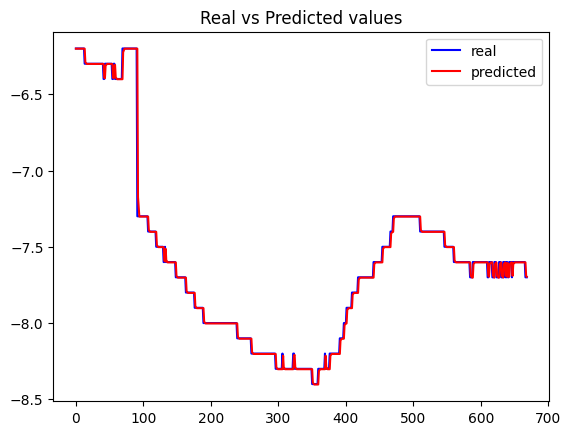

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'epsilon': [0.1, 0.2, 0.3, 0.5, 1.0],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

# defining the gridsearchCV object
grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)

# Fit the data
grid.fit(X_train, Y_train)

# Make predictions
pred = grid.predict(X_test)

# Calculate metrics
calculate_metrics(Y_test, pred)

draw_true_predict(Y_test, pred)